# Series 8, Introduction to Computational Finance, Dimitris Proios,
## Minority Game

### Exercise 1 ) Implement a Minority Game.

### Problem description 

Elements of game :

#### Agent

An agent will not make a decision based on other agents but only based on hist own history and on the random choice of initial S strategies.
At every round he will be choosing the action $a^{\mu(t)}_{i,S}$ where:
- S = strategy chosen 
- i = index of agent 
- ${\mu(t)}$ = the past record of victories for the specific  agent for the given iteration

#### Simulation:

In every turn all agent will be called to give a choice 
based on those the simulatino engine will give:
- to the minority a win (1) 
- the majority a loss (-1).

#### Strategy selection:

- strategy selection followes the folloing patter initially we select a number of S strategies from the possible $2**2**M$
- in every iteration will throw a roulette calculation and select from the S strategies 
- if he won based on some strategy a sccore is assigned to bias the selecction towards that strategy.
- Important note: in the experimentation I also tried strategies totally at totally random, and filter between a set of random strategies.

In [1]:
import random
import numpy as np
import itertools
import copy
import time
import matplotlib.pyplot as plt
import statistics

def getStrategy(M):
    return "".join([str (random.choice([0,1])) for i in range(0,2**M)]) 


def roullette(choices, weights):
    choices_dict = {}
    for index, k in enumerate(choices):
          choices_dict[k]=weights[index]
    max = sum(choices_dict.values())
    pick = random.uniform(0, max)
    current = 0
    for key, value in choices_dict.items():
        current += value
        if current > pick:
            return key


class Agent():
    def __init__(self, strategies, possible_history, M):
        # for M = 3, 8 answers for 8 combination
        assert len(strategies[0]) == len(possible_history)
        self.history = [str (random.choice([0,1])) for i in range(0,M)]
        self.history = "".join(self.history)
        self.strategy_scores= [0 for _ in range(S)]
        self.strategies = strategies
        self.current_choice = random.choice([0,1])
        self.chosen_strategy_index = random.choice(range(S))

    def choose(self, iteration_number, possible_historyDict):
        # chosen_strategy_index = random.choice(range(S))
        chosen_strategy_index = roullette(range(S), self.strategy_scores)
        chosen_strategy = self.strategies[self.chosen_strategy_index]
        index = possible_historyDict[self.history]
        a = int(chosen_strategy[index])
        if a == 0:
          a = -1 
        self.current_choice = a
        return a
    
    def set_agent_history(self, A):
        self.history=self.history[1:]
        g =- A  * self.current_choice
        # agent lost belongs to majority  
        if g > 0:
            self.history += "1"
            self.strategy_scores[self.chosen_strategy_index]+=1
            # agent won belongs to minority 
        if g < 0:
            self.history += "0"
        

class MinorityGame():
    def __init__(
        self, 
        N, 
        M, 
        S, 
        possible_history, 
        iterations_per_simulation,
        possible_historyDict
    ): 
        self.A = []
        self.agents = []
        for i in range(N): 
            # store available strategies per agent
            self.strategies = []
            self.strategies = [getStrategy(M) for _ in range(S)]
            self.agents.append(Agent(self.strategies, possible_history, M))
        
        for iteration_number in range(0, iterations_per_simulation):
            moves = []
            for agent_index in range(0,N):
                moves.append(self.agents[agent_index].choose(iteration_number, possible_historyDict))
            self.A.append(sum(moves))
            # A in the last position contains who lost an d who won
            for agent_index in range(0,N):
                self.agents[agent_index].set_agent_history(
                    self.A[-1]
                )

    def get_Variance_A(self):
        # !fun fact np.variance is not behaving same as statistics.variance 2 hours lost there :D 
        # statistics.variance([1,0,-1]) =1 
        # np.var([1,0,-1])=0,66
        return np.var(self.A)
    
    def get_A(self):
        return self.A

## Experiments
### Exercicse 2)
Draw the curve describing how the variance ${\sigma^2/N}$ of the participation A
depends on the parameter    ${a=2^M/N }$ . 
Here N denotes the number of agents and the length of the historical window taken into consideration by an agent.


#### Solution
We run an experiment for S = 2, M = 1..15, iterations = 300 and N=101 

In [2]:
def experiment(
    N, 
    M, 
    S, 
    iterations_per_simulation
):
        possible_history = ["".join(seq) for seq in itertools.product("01", repeat=M)]
        possible_historyDict=dict(enumerate(possible_history))
        possible_historyDict=dict(map(reversed, possible_historyDict.items()))
        return MinorityGame(
                    N, 
                    M, 
                    S, 
                    possible_history, 
                    iterations_per_simulation,
                    possible_historyDict
        )   
        

In [3]:

N=101
M=10
S=2
iterations_per_simulation = 500

res = experiment(
    N, 
    M, 
    S, 
    iterations_per_simulation
)
res.get_Variance_A()

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


106.79070400000002


# When S = 2 ( S
being the number of strategies), what is the critical value
$α_c$
for which  ${\sigma^2/N }$ reaches a minimum


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


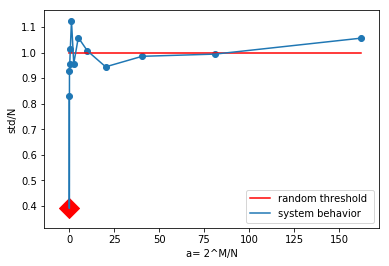

a_c =  0.039603960396039604


(array([3.96039604e-02, 7.92079208e-02, 1.58415842e-01, 3.16831683e-01,
        6.33663366e-01, 1.26732673e+00, 2.53465347e+00, 5.06930693e+00,
        1.01386139e+01, 2.02772277e+01, 4.05544554e+01, 8.11089109e+01,
        1.62217822e+02]),
 [83.90626666666667,
  39.41493333333334,
  93.87995555555555,
  96.62093333333333,
  102.59,
  113.63106666666667,
  96.60173333333333,
  106.9284888888889,
  101.66306666666667,
  95.37222222222222,
  99.52795555555555,
  100.39928888888889,
  106.69773333333333])

In [4]:
S=2
simulations_varying_M = []
MS= range(2,15)
N=101
iterations_per_simulation = 300
for M in MS:
        simulations_varying_M.append(
            experiment(
                N, 
                M, 
                S, 
                iterations_per_simulation
            )
        )

        
sigmasN = np.asarray([s.get_Variance_A() for s in simulations_varying_M]) / float(N)
alpha_list = np.asarray([2**M for M in MS]) /float(N)

plt.plot(alpha_list, [1 for _ in range(0, len(alpha_list))], 'r-')
plt.scatter(alpha_list, sigmasN)
plt.plot(alpha_list, sigmasN)
plt.scatter(x=np.argmin(min(sigmasN)), y=min(sigmasN), c='red', marker='D', s=200)
plt.xlabel("a= 2^M/N")
plt.ylabel("std/N")
plt.legend(["random threshold ", "system behavior"])
plt.show()  
a_c= min(alpha_list)
print("a_c = ", a_c)
alpha_list, [s.get_Variance_A() for s in simulations_varying_M]

I also tried to keep M steady and loop through N 

In [5]:
S=2
simulations_M_stead_N_varying = []
N_LIST = range(101,2101, 100)
M=5
iterations_per_simulation = 1000
for N in N_LIST:
    simulations_M_stead_N_varying.append(
        experiment(
            N, 
            M, 
            S, 
            iterations_per_simulation
        )
    )

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


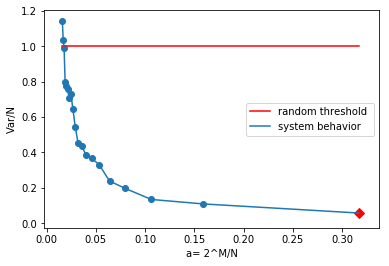

In [6]:
def visualize_S2(M, N_LIST,simulations_M_stead_N_varying):

    alpha_list = np.asarray([(2**M)/N for N in N_LIST])
    sigmasN = np.asarray([s.get_Variance_A() for s in simulations_M_stead_N_varying]) / N
    
    # draw line of threshold at variance value 1 
    plt.plot(alpha_list, [1 for _ in range(0, len(alpha_list))], 'r-')
    
    # draw data points and lines 
    plt.scatter(alpha_list, sigmasN); plt.plot(alpha_list, sigmasN)
    
    # draw minimum point
    plt.scatter(x=alpha_list[np.argmin(min(sigmasN))], y=min(sigmasN), c='red', marker='D', s=50)
    plt.xlabel("a= 2^M/N");    plt.ylabel("Var/N");    plt.legend(["random threshold ", "system behavior"])
    plt.show()  


visualize_S2(M, N_LIST,simulations_M_stead_N_varying)
# M, NS, simulations_M_stead_N_varying


### Attendance plots

I created some attendance plots to observe the behavior for every M in correlation with the attendance A.This way we can observer seperately the behavior for every differnet value of M.

<Figure size 432x288 with 0 Axes>

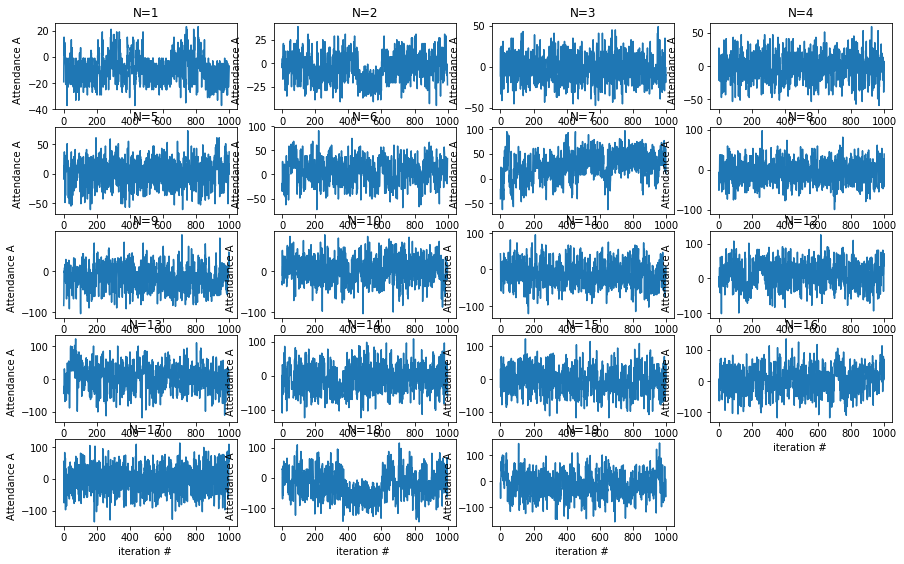

(20, 20)

In [7]:
def showPlots(plots, titles):
    plt.tight_layout(pad=2., w_pad=1., h_pad=2.0)
    fig=plt.figure(figsize=(15, 15))
    columns = 4
    rows = 8
    k=1
    for i in range(1, len(plots)):
        fig.add_subplot(rows, columns, i)
        plt.plot(*plots[k-1])
        plt.xlabel("iteration # ")
        plt.ylabel("Attendance A  ")
        
        plt.title(titles[k-1])
        k+= 1
    plt.show()
        
Attendances = np.asarray([s.get_A() for s in simulations_M_stead_N_varying])
plots=[]
titles = []
for A in range(0,len(Attendances)):
            titles.append("N="+ str(A+1))
            Iterations = np.asarray([x for x in range(0,iterations_per_simulation)])
            plots.append((Iterations, Attendances[A]))
showPlots(plots[:31], titles[:31])
len(plots), len(titles)

In [8]:
simulations_M_stead_N_varying[0].get_A() 
simulations_M_stead_N_varying[0].get_Variance_A()


114.351216

##  Finally we experiment with  :
 - various agents number 
 - for sizes of history M 
 - with a prefixed set of strategies per agent and on which every agent will be choosing one at every iteration
 - with the meta-strategy (how who choose strategies)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


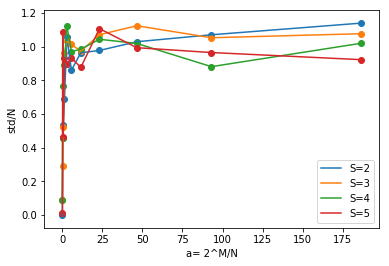

In [9]:
N = 11
S_num = range(2,6)
iterations_per_simulation=300
MS= range(1,12)

for S in S_num:
    simulations_S = []

    for M in MS:
        simulations_S.append(
                experiment(
                    N, 
                    M, 
                    S, 
                    iterations_per_simulation
                )
        )
            
    simulations_S = [s.get_Variance_A() for s in simulations_S]
    sigmas = simulations_S
    sigmasN = np.asarray(sigmas)/ N
    aN = np.asarray([2**M for M in MS])/N

    plt.plot(aN, sigmasN)
    plt.scatter(aN, sigmasN)
    plt.legend(["S="+str(s) for s in S_num])
    plt.xlabel("a= 2^M/N")
    plt.ylabel("std/N")
plt.show()  